In [21]:
from trace_IO import *
from OF_trigger import *
from OF import OptimumFilter  # Replace with actual module path

import matplotlib.pyplot as plt
import numpy as np
import time


sampling_frequency = 3906250


template = np.load("../templates/template_K_alpha_no_baseline.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")
# Parameters
energy = 135
n_sets = 100
# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)
of = OptimumFilter(template, noise_psd, sampling_frequency)



In [ ]:
# Load traces for a single energy level
trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)


max_amplitudes = []

for i in range(n_sets):
    amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
    max_amplitudes.append(np.max(amps))

max_amplitudes = np.array(max_amplitudes)



Max amplitude per trace set:
[2.37061019e-02 9.19317124e+00 2.91921022e-02 6.58547358e+00
 6.21156399e-02 7.76208793e+00 2.38603187e-02 7.51221526e+00
 2.43000619e-02 8.61693742e+00 1.53847499e+01 2.89531224e+01
 1.10835579e+01 2.72636254e+01 7.46607212e-02 9.25608604e+00
 7.11847913e-02 7.37181020e+00 2.84368984e-02 7.69974321e+00
 9.48852640e+00 2.63774740e+01 1.15259386e+01 2.86044734e+01
 5.67483282e-02 6.16646894e+00 1.00644687e+01 2.56208506e+01
 3.10092770e-02 9.61017689e+00 1.58863331e+01 2.69616845e+01
 1.15562109e+01 2.64809884e+01 9.51106890e+00 2.56985531e+01
 2.37825100e-02 8.93962312e+00 2.98056507e-02 7.54430409e+00
 2.51205629e-02 6.91069258e+00 1.04626915e+01 2.71238453e+01
 7.78138243e+00 2.48881493e+01 8.00579208e-02 8.62023059e+00
 4.13017099e-02 9.55868459e+00 1.45688450e+01 2.81440097e+01
 2.37487722e-02 7.08709469e+00 5.90138283e-02 9.21331250e+00
 2.60538926e-02 9.51826578e+00 2.31823563e-02 5.80809288e+00
 3.07574044e-02 7.76153652e+00 9.53390330e+00 2.66402503

In [28]:
# Load traces for a single energy level
trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

max_amplitudes = []
n_passed = 0  # Counter for passing sets

for i in range(n_sets):
    amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
    max_amp = np.max(amps)
    max_amplitudes.append(max_amp)

    if max_amp > 5:
        n_passed += 1

max_amplitudes = np.array(max_amplitudes)

# Compute and print pass rate
pass_rate = n_passed / n_sets
print(f"Pass rate: {pass_rate:.2%}")


Pass rate: 66.00%


Processing energies: 100%|██████████| 21/21 [04:29<00:00, 12.85s/it]


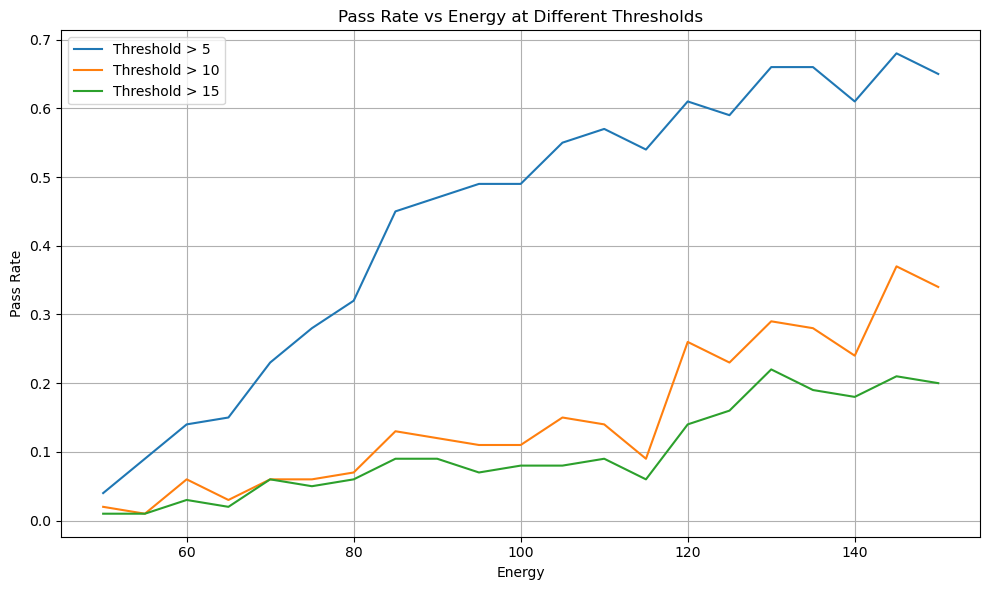

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

energy_values = list(range(50, 151, 5))
thresholds = [5, 10, 15]
pass_rates_by_threshold = {th: [] for th in thresholds}

n_sets = 100  # Adjust as needed

for energy in tqdm(energy_values, desc="Processing energies"):
    trace_path = f"/ceph/dwong/trigger_samples/traces_energy_{energy}.zst"
    loaded_traces = load_traces_from_zstd(trace_path, n_traces=n_sets)

    max_amplitudes = []

    for i in range(n_sets):
        amps = [trigger.fit_with_shift(trace)[0] for trace in loaded_traces[i]]
        max_amplitudes.append(np.max(amps))

    max_amplitudes = np.array(max_amplitudes)

    for th in thresholds:
        pass_rate = np.sum(max_amplitudes > th) / n_sets
        pass_rates_by_threshold[th].append(pass_rate)

# Plotting
plt.figure(figsize=(10, 6))
for th in thresholds:
    plt.plot(energy_values, pass_rates_by_threshold[th], label=f'Threshold > {th}')

plt.xlabel('Energy(e)')
plt.ylabel('Pass Rate')
plt.title('Pass Rate vs Energy at Different Thresholds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


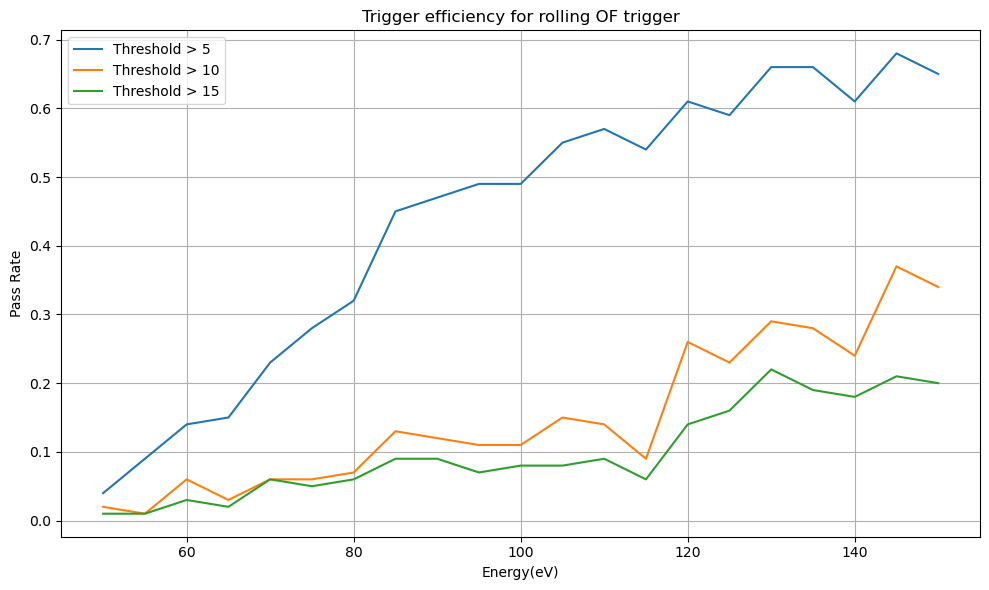

In [32]:
# Plotting
plt.figure(figsize=(10, 6))
for th in thresholds:
    plt.plot(energy_values, pass_rates_by_threshold[th], label=f'Threshold > {th}')

plt.xlabel('Energy(eV)')
plt.ylabel('Pass Rate')
plt.title('Trigger efficiency for rolling OF trigger')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
